In [1]:
from datetime import datetime
import glob
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import zipfile

### GATHER

##### Opening the tweets.txt Json file in read mode as a string. Reading each line and transforming each line as a dictionary

import tweepy

from tweepy import OAuthHandler

import json

from timeit import default_timer as timer

consumer_key = 'HIDDEN'

consumer_secret = 'HIDDEN'

access_token = 'HIDDEN'

access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = df_1.tweet_id.values

len(tweet_ids)


count = 0

fails_dict = {}

start = timer()

with open('tweet_json.txt', 'w') as outfile:

    for tweet_id in tweet_ids:
    
        count += 1
        
        print(str(count) + ": " + str(tweet_id))
        
        try:
        
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            
            print("Success")
            
            json.dump(tweet._json, outfile)
            
            outfile.write('\n')
            
        except tweepy.TweepError as e:
        
            print("Fail")
            
            fails_dict[tweet_id] = e
            
            pass
            
end = timer()

print(end - start)

print(fails_dict)


'tweet.txt' in ressource tab

##### Storing the tweets.Json with pandas read_json

In [2]:
df = pd.read_json('tweets.txt', lines= True)

##### Storing the twitter-archive-enhanced.csv with pandas read_csv

In [3]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

##### Downloading programmatically the prediction.tsv dataset 

In [4]:
import requests

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [6]:
response = requests.get(url)

In [7]:
with open('imagePrediction.tsv', 'wb') as file:
    file.write(response.content)

***

### ASSESS

#### Assessing the tweets json data 

In [8]:
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [9]:
df.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2353,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2535,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [11]:
df.id.nunique()

2354

In [12]:
df.retweeted.unique()

array([False])

In [13]:
df[df.retweeted_status.notnull() == False]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


There are 2354 unique tweet ids

geo, coordinates, place, and contributor columns have strictly Null values and should be removed

Tweet Id column is duplicated in the dataframe

retweeted boolean colum shows only one value False 

retweeted status column contains non-null values in 179 rows : dictionaries of the tweets containing data

***

##### Assessing the twiter archive enhanced data

In [14]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
df1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

***

##### Assessing the prediction.tsv dataset 

In [17]:
df2 = pd.read_csv('imagePrediction.tsv', sep='/t', delimiter= '\s+')  
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
df2.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
df2.img_num.describe()

count    2075.000000
mean        1.203855
std         0.561875
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: img_num, dtype: float64

***

Quality:

-Geo, coordinates, place, and contributor columns are Null values (df, dataframe-tweetJson data)

-retweeted status id wrong format in scientific notation (df1, dataframe-twitter enhanced archive data, df: tweets.Json data)

-animal/object name columns (p1, p2, p3) with underscores (df2, prediction data set)

-finale merged data (final_data, dataframe) with NaN values accorss object/animal 3 columns 

-final_data columns names

-animal_1, animal_2, animal_3 dataframes with NaN values (3 subsets of final_data)

-twitter_archive_master.csv has tweets with 0 likes and must be addressed 

-Non Null in retweeted status colum corresponding to rows where the tweets are "retweeted" 179 are removed (df dataframe)


Tidiness:

-merging 3 dataframes.

-df1: doggo, flopper, poppo, pupper columns representing the same varibale 

***

### CLEAN

##### Define 
remove columns with all Null values and remove irrelevant columns to the purpose of this wrangling and subsequent merging procedure

remove rows where retweeet status is not Null 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

##### Code

In [22]:
df = df[df.retweeted_status.notnull() == False]

In [23]:
df = df[['created_at', 'id', 'retweet_count', 'favorite_count']]

###### TEst

In [24]:
df

,created_at,id,retweet_count,favorite_count
0,2017-08-01 16:23:56+00:00,892420643555336193,8853,39467
1,2017-08-01 00:17:27+00:00,892177421306343426,6514,33819
2,2017-07-31 00:18:03+00:00,891815181378084864,4328,25461
3,2017-07-30 15:58:51+00:00,891689557279858688,8964,42908
4,2017-07-29 16:00:24+00:00,891327558926688256,9774,41048
...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,41,111
2350,2015-11-16 00:04:52+00:00,666044226329800704,147,311
2351,2015-11-15 23:21:54+00:00,666033412701032449,47,128
2352,2015-11-15 23:05:30+00:00,666029285002620928,48,132


Removing rows where retweeted statuses are not NUll 

changning the columns names

In [25]:
df.columns = ['time_stamp', 'tweet_id', 'retweet_count', 'like_count']

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   time_stamp     2175 non-null   datetime64[ns, UTC]
 1   tweet_id       2175 non-null   int64              
 2   retweet_count  2175 non-null   int64              
 3   like_count     2175 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 85.0 KB


Setting the tweet/post Id as an index to prepare for joining dataframes 

In [27]:
df.set_index('tweet_id', inplace= True)

In [28]:
df.head()

,time_stamp,retweet_count,like_count
tweet_id,,,
892420643555336193,2017-08-01 16:23:56+00:00,8853,39467
892177421306343426,2017-08-01 00:17:27+00:00,6514,33819
891815181378084864,2017-07-31 00:18:03+00:00,4328,25461
891689557279858688,2017-07-30 15:58:51+00:00,8964,42908
891327558926688256,2017-07-29 16:00:24+00:00,9774,41048


***

###### define 

###### quality issue resolved in df1 dataframe/ possible codes to resolve the issues / wrong format
##### mergind the dog stage name 3 columns with conditional code to change values in the name colum  

Creating a mask to pull the non null values

###### code

In [29]:
not_Na_mask = df1.retweeted_status_id.notna()

###### test

Converting scientific notation to integer

In [30]:
df1.retweeted_status_id[not_Na_mask].astype('int64')

19      887473957103951872
32      886053734421102592
36      830583320585068544
68      878057613040115712
73      878281511006478336
               ...        
1023    667866724293877760
1043    667138269671505920
1242    711998279773347840
2259    667548695664070656
2260    667548415174144000
Name: retweeted_status_id, Length: 181, dtype: int64

###### rating numerator extreme values inputation 


In [31]:
df1.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

###### code

In [32]:
df1.rating_numerator[df1.rating_numerator>12] 

0        13
1        13
3        13
5        13
6        13
       ... 
2037     13
2074    420
2172     13
2212     13
2228     13
Name: rating_numerator, Length: 433, dtype: int64

In [33]:
df1.rating_numerator[df1.rating_numerator>12].unique()

array([  13,   14,   17,  420,  666,   15,  182,  960,   75,   84,   24,
         27,  165, 1776,  204,   50,   99,   80,   45,   60,   44,  143,
        121,   20,   26,  144,   88], dtype=int64)

In [34]:
%%capture
df1.rating_numerator[df1.rating_numerator>12] = 13

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [40]:
df1.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [42]:
df1.floofer.unique()

array(['None', 'floofer'], dtype=object)

In [43]:
df1.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [45]:
df1.puppo.unique()

array(['None', 'puppo'], dtype=object)

Changing values of dog stage names 

In [46]:
df1['stage_name']=''

In [47]:
df1.loc[df1.doggo == "doggo", "stage_name"] = "doggo"

In [48]:
df1.loc[df1.floofer == "floofer", "stage_name"] = "floofer"

In [49]:
df1.loc[df1.pupper == "pupper", "stage_name"] = "pupper"

In [50]:
df1.loc[df1.puppo == "puppo", "stage_name"] = "puppo"

In [53]:
df1.stage_name.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

****

###### Define

changing timestamp format to datetime

In [36]:
pd.to_datetime(df1.timestamp)

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2356, dtype: datetime64[ns, UTC]

subsetting, and extracting the most useful columns: the tweet Id, and the rating from twitter enhanced data set  

In [37]:
df1 = df1[['tweet_id', 'rating_numerator']]

In [38]:
df1

,tweet_id,rating_numerator
0,892420643555336193,13
1,892177421306343426,13
2,891815181378084864,12
3,891689557279858688,13
4,891327558926688256,12
...,...,...
2351,666049248165822465,5
2352,666044226329800704,6
2353,666033412701032449,9
2354,666029285002620928,7


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   tweet_id          2356 non-null   int64
 1   rating_numerator  2356 non-null   int64
dtypes: int64(2)
memory usage: 36.9 KB


In [40]:
df1.tweet_id.nunique()

2356

The twitter archive data set has 16 columns, the presumably most substantial columns are timestamp (the post date), which is already present with the post ID is the Json file. Furthermore, the rating numerator matters, and naturally the tweet ID, to proceed with Data frames joinining. It is important to notice here that there are 2356 rows (IDs and ratings).

In [41]:
# setting the post/tweet ID as an index to prepare for a join 

df1.set_index('tweet_id', inplace= True)

In [42]:
df1.head()

,rating_numerator
tweet_id,
892420643555336193,13
892177421306343426,13
891815181378084864,12
891689557279858688,13
891327558926688256,12


***

###### quality issue resolved in df2 dataframe /possible code to resolve the issue

In [43]:
df2.p1[0].replace("_", " ")

'Welsh springer spaniel'

***

##### copies of original dataframes 

In [54]:
df_copy = df.copy()
df1_copy = df1.copy()
df2_copy = df2.copy()

### MERGING AND JOINING 

#### Joining df and df1 

In [44]:
# joining df1 with 2356 rows and IDs on df  with 1177 rows and IDs, 
merge1 = df.join(df1)
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   time_stamp        2175 non-null   datetime64[ns, UTC]
 1   retweet_count     2175 non-null   int64              
 2   like_count        2175 non-null   int64              
 3   rating_numerator  2175 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 165.0 KB


In [45]:
merge1

,time_stamp,retweet_count,like_count,rating_numerator
tweet_id,,,,
892420643555336193,2017-08-01 16:23:56+00:00,8853,39467,13
892177421306343426,2017-08-01 00:17:27+00:00,6514,33819,13
891815181378084864,2017-07-31 00:18:03+00:00,4328,25461,12
891689557279858688,2017-07-30 15:58:51+00:00,8964,42908,13
891327558926688256,2017-07-29 16:00:24+00:00,9774,41048,12
...,...,...,...,...
666049248165822465,2015-11-16 00:24:50+00:00,41,111,5
666044226329800704,2015-11-16 00:04:52+00:00,147,311,6
666033412701032449,2015-11-15 23:21:54+00:00,47,128,9


***

#### Preparing the last dataset for merging, the df2 contains 3 prediction column with dogs name mostly suggesting that each picture contains more than one dog. the  approach would be to subset each dog column with True prediction and tweet IDs and join it on the previous merged 2 data sets. In total, we will perform 3 merging. 

In [46]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [47]:
df2_dog1 = df2[df2.p1_dog == True][['tweet_id', 'p1']]
df2_dog1

,tweet_id,p1
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher
...,...,...
2068,890971913173991426,Appenzeller
2069,891087950875897856,Chesapeake_Bay_retriever
2070,891327558926688256,basset
2072,891815181378084864,Chihuahua


In [48]:
# setting the post/tweet ID as an index to prepare for a join 

df2_dog1.set_index('tweet_id', inplace= True)

***

First merge between Result (merged df and df1) and df2_dog1 

In [49]:
dataset = merge1.join(df2_dog1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   time_stamp        2175 non-null   datetime64[ns, UTC]
 1   retweet_count     2175 non-null   int64              
 2   like_count        2175 non-null   int64              
 3   rating_numerator  2175 non-null   int64              
 4   p1                1477 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 182.0+ KB


***

Preparing the second dog column for merging 

In [50]:
df2_dog2 = df2[df2.p2_dog == True][['tweet_id', 'p2']]
df2_dog2

,tweet_id,p2
0,666020888022790149,collie
1,666029285002620928,miniature_pinscher
2,666033412701032449,malinois
3,666044226329800704,redbone
4,666049248165822465,Rottweiler
...,...,...
2069,891087950875897856,Irish_terrier
2070,891327558926688256,English_springer
2071,891689557279858688,Labrador_retriever
2072,891815181378084864,malamute


In [51]:
# setting the post/tweet ID as an index to prepare for a join 

df2_dog2.set_index('tweet_id', inplace= True)

Merging df2_dog2 with dataset 

In [52]:
dataset2 = dataset.join(df2_dog2)
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   time_stamp        2175 non-null   datetime64[ns, UTC]
 1   retweet_count     2175 non-null   int64              
 2   like_count        2175 non-null   int64              
 3   rating_numerator  2175 non-null   int64              
 4   p1                1477 non-null   object             
 5   p2                1495 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 198.9+ KB


In [53]:
dataset2

,time_stamp,retweet_count,like_count,rating_numerator,p1,p2
tweet_id,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,8853,39467,13,NaN,NaN
892177421306343426,2017-08-01 00:17:27+00:00,6514,33819,13,Chihuahua,Pekinese
891815181378084864,2017-07-31 00:18:03+00:00,4328,25461,12,Chihuahua,malamute
891689557279858688,2017-07-30 15:58:51+00:00,8964,42908,13,NaN,Labrador_retriever
891327558926688256,2017-07-29 16:00:24+00:00,9774,41048,12,basset,English_springer
...,...,...,...,...,...,...
666049248165822465,2015-11-16 00:24:50+00:00,41,111,5,miniature_pinscher,Rottweiler
666044226329800704,2015-11-16 00:04:52+00:00,147,311,6,Rhodesian_ridgeback,redbone
666033412701032449,2015-11-15 23:21:54+00:00,47,128,9,German_shepherd,malinois


***

Preparing the third dog column for merging with data (dataframe)

In [54]:
df2_dog3 = df2[df2.p3_dog == True][['tweet_id', 'p3']]
df2_dog3

,tweet_id,p3
0,666020888022790149,Shetland_sheepdog
1,666029285002620928,Rhodesian_ridgeback
2,666033412701032449,bloodhound
3,666044226329800704,miniature_pinscher
4,666049248165822465,Doberman
...,...,...
2066,890609185150312448,Chesapeake_Bay_retriever
2067,890729181411237888,Pembroke
2070,891327558926688256,German_short-haired_pointer
2072,891815181378084864,kelpie


In [55]:
# setting the post/tweet ID as an index to prepare for a join 

df2_dog3.set_index('tweet_id', inplace= True)

Merging df2_dog3 with dataset 

In [56]:
final_data = dataset2.join(df2_dog3)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   time_stamp        2175 non-null   datetime64[ns, UTC]
 1   retweet_count     2175 non-null   int64              
 2   like_count        2175 non-null   int64              
 3   rating_numerator  2175 non-null   int64              
 4   p1                1477 non-null   object             
 5   p2                1495 non-null   object             
 6   p3                1446 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 215.9+ KB


##### Quality issue resolved in final_data (changing columns name) 

In [57]:
final_data.columns = ['time_stamp', 'retweet_count', 'like_count', 'rating_over_10', 'animal_1', 'animal_2', 'animal_3']

In [58]:
final_data

,time_stamp,retweet_count,like_count,rating_over_10,animal_1,animal_2,animal_3
tweet_id,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,8853,39467,13,NaN,NaN,NaN
892177421306343426,2017-08-01 00:17:27+00:00,6514,33819,13,Chihuahua,Pekinese,papillon
891815181378084864,2017-07-31 00:18:03+00:00,4328,25461,12,Chihuahua,malamute,kelpie
891689557279858688,2017-07-30 15:58:51+00:00,8964,42908,13,NaN,Labrador_retriever,NaN
891327558926688256,2017-07-29 16:00:24+00:00,9774,41048,12,basset,English_springer,German_short-haired_pointer
...,...,...,...,...,...,...,...
666049248165822465,2015-11-16 00:24:50+00:00,41,111,5,miniature_pinscher,Rottweiler,Doberman
666044226329800704,2015-11-16 00:04:52+00:00,147,311,6,Rhodesian_ridgeback,redbone,miniature_pinscher
666033412701032449,2015-11-15 23:21:54+00:00,47,128,9,German_shepherd,malinois,bloodhound


In [59]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   time_stamp      2175 non-null   datetime64[ns, UTC]
 1   retweet_count   2175 non-null   int64              
 2   like_count      2175 non-null   int64              
 3   rating_over_10  2175 non-null   int64              
 4   animal_1        1477 non-null   object             
 5   animal_2        1495 non-null   object             
 6   animal_3        1446 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 215.9+ KB


### with various merges, some of the data is lost. Moreover, False prediction data does not reveal the actual object/animal in the pic, which leaves some of the tweets with one or 2 dogs, and in some cases NaN values in all rows but the tweet has likes and been retweeted. There is no other option to minimize the loss of data by dropping all rows that have exclusively in all columns NaN values. 

##### Quality issue resolved in final_data, removing rows with NaN values accorss the 3 animals name columns 

In [60]:
final_data.dropna(subset=['animal_1', 'animal_2', 'animal_3'], how='all', inplace= True)

In [61]:
final_data

,time_stamp,retweet_count,like_count,rating_over_10,animal_1,animal_2,animal_3
tweet_id,,,,,,,
892177421306343426,2017-08-01 00:17:27+00:00,6514,33819,13,Chihuahua,Pekinese,papillon
891815181378084864,2017-07-31 00:18:03+00:00,4328,25461,12,Chihuahua,malamute,kelpie
891689557279858688,2017-07-30 15:58:51+00:00,8964,42908,13,NaN,Labrador_retriever,NaN
891327558926688256,2017-07-29 16:00:24+00:00,9774,41048,12,basset,English_springer,German_short-haired_pointer
891087950875897856,2017-07-29 00:08:17+00:00,3261,20562,13,Chesapeake_Bay_retriever,Irish_terrier,NaN
...,...,...,...,...,...,...,...
666049248165822465,2015-11-16 00:24:50+00:00,41,111,5,miniature_pinscher,Rottweiler,Doberman
666044226329800704,2015-11-16 00:04:52+00:00,147,311,6,Rhodesian_ridgeback,redbone,miniature_pinscher
666033412701032449,2015-11-15 23:21:54+00:00,47,128,9,German_shepherd,malinois,bloodhound


##### Tidiness issue solving (one variable in 3 columns, reshaping the final dataframe)

### We can resturcture the data frame by subseting with each animal/object colum -> having 3 dataset to concatenate -> the final data set will have Tweet ids repeated. and can be grouped by tweet IDs again

In [62]:
animal_1 = final_data[['time_stamp', 'retweet_count', 'like_count', 'rating_over_10', 'animal_1']]
animal_2 = final_data[['time_stamp', 'retweet_count', 'like_count', 'rating_over_10', 'animal_2']]
animal_3 = final_data[['time_stamp', 'retweet_count', 'like_count', 'rating_over_10', 'animal_3']]

 remove rows in each single data frame that has an NaN value  / Quality issue recolved 

In [63]:
%%capture
animal_1.dropna(inplace= True)
animal_2.dropna(inplace= True)
animal_3.dropna(inplace= True)

Re-uniting the columns names pre-concatenation process

In [64]:
animal_1.columns = ['time_stamp', 'retweet_count', 'like_count', 'rating_over_10', 'animal/object']
animal_2.columns = ['time_stamp', 'retweet_count', 'like_count', 'rating_over_10', 'animal/object']
animal_3.columns = ['time_stamp', 'retweet_count', 'like_count', 'rating_over_10', 'animal/object']

***

re-merge all the datasets (combine) 

In [65]:
frames = [animal_1, animal_2, animal_3]

twitter_archive_master = pd.concat(frames)

In [66]:
twitter_archive_master

,time_stamp,retweet_count,like_count,rating_over_10,animal/object
tweet_id,,,,,
892177421306343426,2017-08-01 00:17:27+00:00,6514,33819,13,Chihuahua
891815181378084864,2017-07-31 00:18:03+00:00,4328,25461,12,Chihuahua
891327558926688256,2017-07-29 16:00:24+00:00,9774,41048,12,basset
891087950875897856,2017-07-29 00:08:17+00:00,3261,20562,13,Chesapeake_Bay_retriever
890971913173991426,2017-07-28 16:27:12+00:00,2158,12041,13,Appenzeller
...,...,...,...,...,...
666049248165822465,2015-11-16 00:24:50+00:00,41,111,5,Doberman
666044226329800704,2015-11-16 00:04:52+00:00,147,311,6,miniature_pinscher
666033412701032449,2015-11-15 23:21:54+00:00,47,128,9,bloodhound


In [67]:
twitter_archive_master.reset_index(inplace= True)

In [68]:
twitter_archive_master

,tweet_id,time_stamp,retweet_count,like_count,rating_over_10,animal/object
0,892177421306343426,2017-08-01 00:17:27+00:00,6514,33819,13,Chihuahua
1,891815181378084864,2017-07-31 00:18:03+00:00,4328,25461,12,Chihuahua
2,891327558926688256,2017-07-29 16:00:24+00:00,9774,41048,12,basset
3,891087950875897856,2017-07-29 00:08:17+00:00,3261,20562,13,Chesapeake_Bay_retriever
4,890971913173991426,2017-07-28 16:27:12+00:00,2158,12041,13,Appenzeller
...,...,...,...,...,...,...
4413,666049248165822465,2015-11-16 00:24:50+00:00,41,111,5,Doberman
4414,666044226329800704,2015-11-16 00:04:52+00:00,147,311,6,miniature_pinscher
4415,666033412701032449,2015-11-15 23:21:54+00:00,47,128,9,bloodhound
4416,666029285002620928,2015-11-15 23:05:30+00:00,48,132,7,Rhodesian_ridgeback


In [69]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

***

### MINI EDA analysis of the merged 3 data sets

In [70]:
data = pd.read_csv('twitter_archive_master.csv')

In [71]:
data.head()

,tweet_id,time_stamp,retweet_count,like_count,rating_over_10,animal/object
0,892177421306343426,2017-08-01 00:17:27+00:00,6514,33819,13,Chihuahua
1,891815181378084864,2017-07-31 00:18:03+00:00,4328,25461,12,Chihuahua
2,891327558926688256,2017-07-29 16:00:24+00:00,9774,41048,12,basset
3,891087950875897856,2017-07-29 00:08:17+00:00,3261,20562,13,Chesapeake_Bay_retriever
4,890971913173991426,2017-07-28 16:27:12+00:00,2158,12041,13,Appenzeller


In [72]:
data.rating_over_10.describe()

count    4418.000000
mean       10.874830
std         1.757276
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        13.000000
Name: rating_over_10, dtype: float64

In [73]:
data.like_count.describe()

count      4418.00000
mean       9272.08239
std       12552.90864
min          81.00000
25%        2203.00000
50%        4503.00000
75%       11752.75000
max      132810.00000
Name: like_count, dtype: float64

### resolving tidiness issue 

REMOVING DUPLICATES BEFORE ANALYZING NUMERICAL VARIABLES/only analyzing numerical variable, since removing duplicates has lost us other dog names/race in the tweet image 

In [75]:
data_copy = data.copy()

In [76]:
index = data_copy.index
is_duplicate = index.duplicated(keep="first")
not_duplicate = ~is_duplicate
data_copy_no_duplicates = data_copy[not_duplicate]

In [77]:
data_copy_no_duplicates.head()

,tweet_id,time_stamp,retweet_count,like_count,rating_over_10,animal/object
0,892177421306343426,2017-08-01 00:17:27+00:00,6514,33819,13,Chihuahua
1,891815181378084864,2017-07-31 00:18:03+00:00,4328,25461,12,Chihuahua
2,891327558926688256,2017-07-29 16:00:24+00:00,9774,41048,12,basset
3,891087950875897856,2017-07-29 00:08:17+00:00,3261,20562,13,Chesapeake_Bay_retriever
4,890971913173991426,2017-07-28 16:27:12+00:00,2158,12041,13,Appenzeller


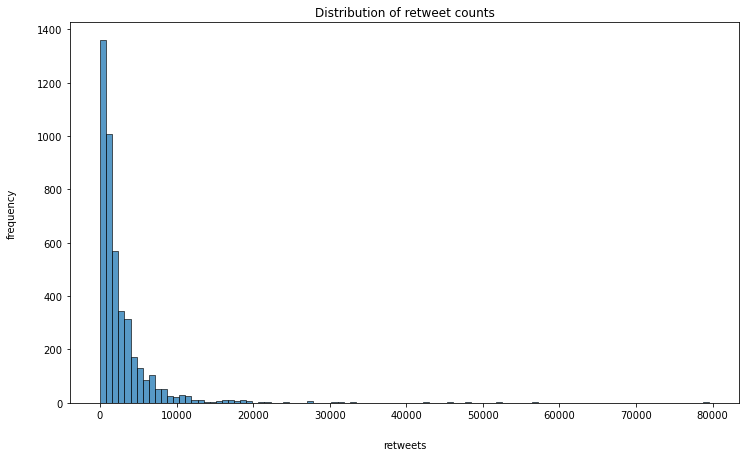

In [78]:
ax, fig = plt.subplots(figsize=(12,7))
ax = sns.histplot(data=data_copy_no_duplicates, x="retweet_count", bins= 100)
plt.xlabel('retweets', labelpad= 20)
plt.ylabel('frequency', labelpad= 20)
plt.title('Distribution of retweet counts');

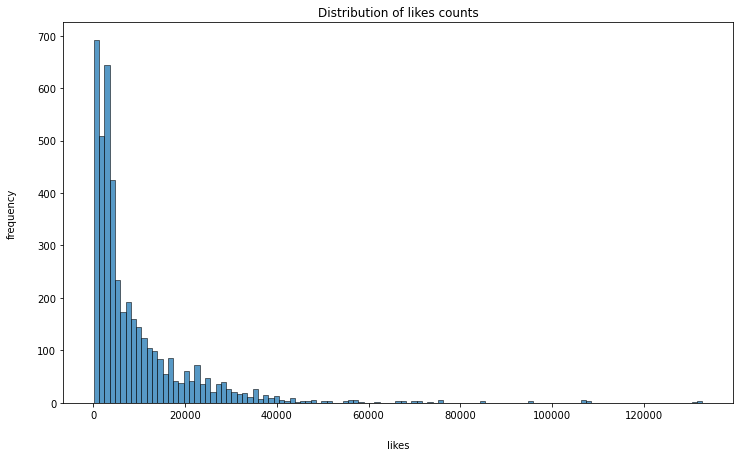

In [79]:
ax, fig = plt.subplots(figsize=(12,7))
ax = sns.histplot(data=data_copy_no_duplicates, x="like_count")
plt.xlabel('likes', labelpad= 20)
plt.ylabel('frequency', labelpad= 20)
plt.title('Distribution of likes counts');

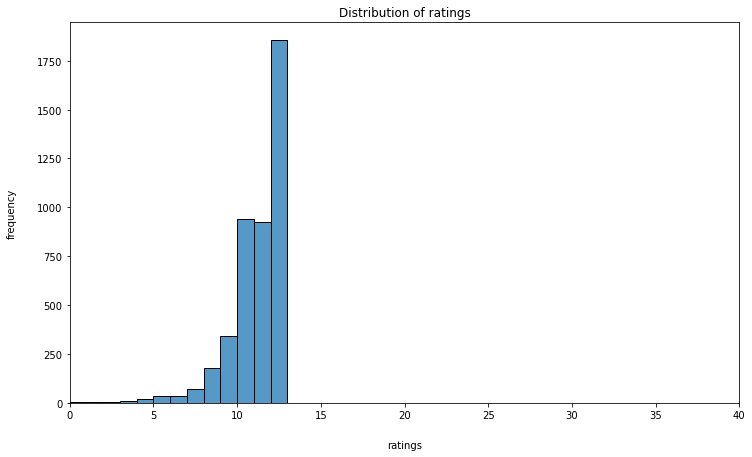

In [80]:
ax, fig = plt.subplots(figsize=(12,7))
ax = sns.histplot(data=data_copy_no_duplicates, x="rating_over_10", bins=13)
plt.xlim((0,40))
plt.xlabel('ratings', labelpad= 20)
plt.ylabel('frequency', labelpad= 20)
plt.title('Distribution of ratings');

In [81]:
# picture with the most likes 

data_copy[data_copy.like_count == max(data_copy.like_count)]

,tweet_id,time_stamp,retweet_count,like_count,rating_over_10,animal/object
249,822872901745569793,2017-01-21 18:26:02+00:00,48265,132810,13,Lakeland_terrier
1727,822872901745569793,2017-01-21 18:26:02+00:00,48265,132810,13,Labrador_retriever
3210,822872901745569793,2017-01-21 18:26:02+00:00,48265,132810,13,Irish_terrier


In [82]:
# picture with the most retweets

data_copy[data_copy.retweet_count == max(data_copy.retweet_count)]

,tweet_id,time_stamp,retweet_count,like_count,rating_over_10,animal/object
617,744234799360020481,2016-06-18 18:26:18+00:00,79515,131075,13,Labrador_retriever
3570,744234799360020481,2016-06-18 18:26:18+00:00,79515,131075,13,whippet


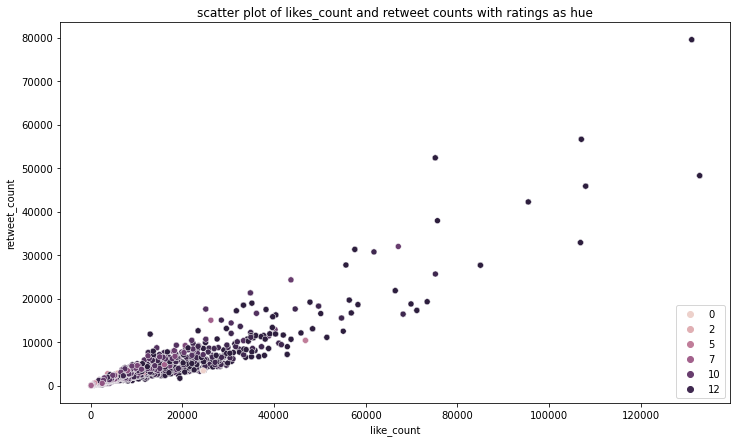

In [83]:
ax, fig = plt.subplots(figsize=(12, 7))
ax = sns.scatterplot(data=data_copy, x="like_count", y="retweet_count", hue="rating_over_10")
plt.legend(loc='lower right')
plt.title('scatter plot of likes_count and retweet counts with ratings as hue');

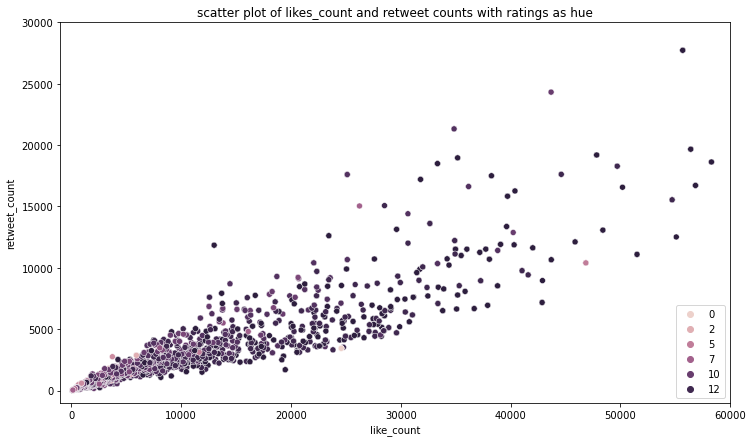

In [84]:
ax, fig = plt.subplots(figsize=(12, 7))
ax = sns.scatterplot(data=data_copy[data_copy.like_count>0], x="like_count", y="retweet_count", hue="rating_over_10")
plt.xlim((-1000,60000))
plt.ylim((-1000,30000))
plt.legend(loc='lower right')
plt.title('scatter plot of likes_count and retweet counts with ratings as hue');